In [3]:
from sklearn.datasets import load_diabetes
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Function: load_diabetes()

This function is designed to load the diabetes dataset, which is a well-known dataset in the field of machine learning.
# Parameter: return_X_y=True

By setting this parameter to True, the function returns the features (independent variables) in X and the target (dependent variable) in y as separate arrays.
If you set it to False, the function would return a Bunch object, which contains the features and target along with some metadata.
# Output:

x contains the features (input variables) of the dataset.
y contains the target variable (in this case, the disease progression measure).

In [7]:
x,y =load_diabetes(return_X_y=True)

In [12]:
print('x_shape',x.shape)
print('y_shape',y.shape)

x_shape (442, 10)
y_shape (442,)


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [24]:
x_train.shape

(353, 10)

In [26]:
x_test.shape

(89, 10)

In [16]:
bgd=LinearRegression()
bgd.fit(x_train,y_train)

LinearRegression()

In [18]:
print('m = ', bgd.coef_)
print('b = ', bgd.intercept_)

m =  [  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
b =  151.88331005254167


In [20]:
y_pred=bgd.predict(x_test)
y_pred

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [22]:
r2_score(y_test,y_pred)

0.4399338661568968

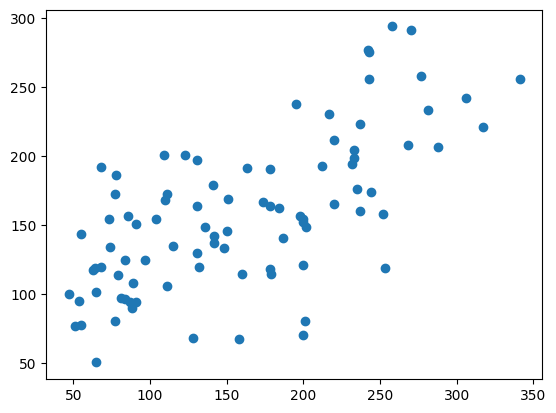

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)

In [38]:
x_train.shape[1]
np.ones(x_train.shape[1])
type(x_train)

numpy.ndarray

# **`Code From Scratch`**

In [129]:
class GDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            # update all the coef and the intercept
            y_hat = np.dot(X_train,self.coef_) + self.intercept_
            #print("Shape of y_hat",y_hat.shape)
            intercept_der = -2 * np.mean(y_train - y_hat)
            self.intercept_ = self.intercept_ - (self.lr * intercept_der)
            
            coef_der = -2 * np.dot((y_train - y_hat),X_train)/X_train.shape[0]
            self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_
        

In [187]:
gdr = GDRegressor(epochs=1000,learning_rate=0.4)


In [189]:
gdr.fit(x_train,y_train)


152.04695545523967 [  23.72258115 -153.73159869  468.33623372  312.6634481   -29.57078448
 -101.98457793 -193.13547041  109.88215911  425.62365976  108.08959706]


In [191]:
y_pred = gdr.predict(x_test)

In [193]:
r2_score(y_test,y_pred)

0.45392659741468355

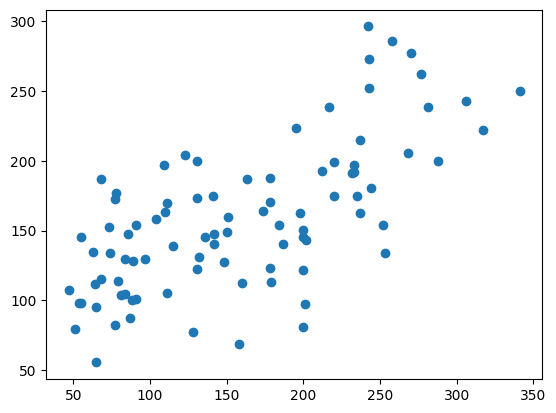

In [195]:
plt.scatter(y_test,y_pred)